In [11]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

dados.columns = ['finalizado', 'horas', 'preco']

troca = {0 : 1, 1 : 0}

dados['finalizado'] = dados['finalizado'].map(troca)

dados.head()

,finalizado,horas,preco
0,0,26,192
1,0,88,9015
2,0,89,2577
3,0,42,275
4,0,39,170


<AxesSubplot:xlabel='horas', ylabel='preco'>

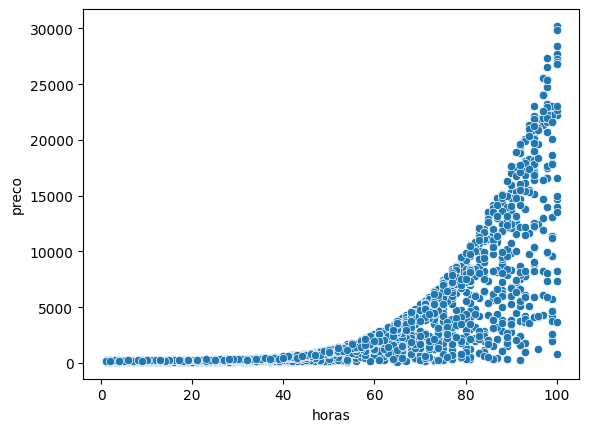

In [3]:
sns.scatterplot(x = 'horas', y = 'preco', data = dados)

<AxesSubplot:xlabel='horas', ylabel='preco'>

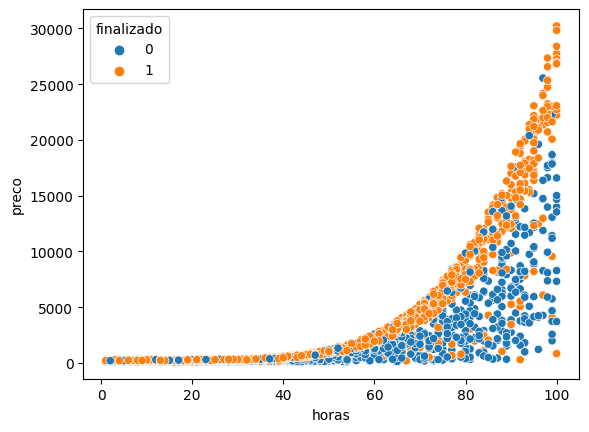

In [4]:
sns.scatterplot(x = 'horas', y = 'preco', data = dados, hue = 'finalizado')

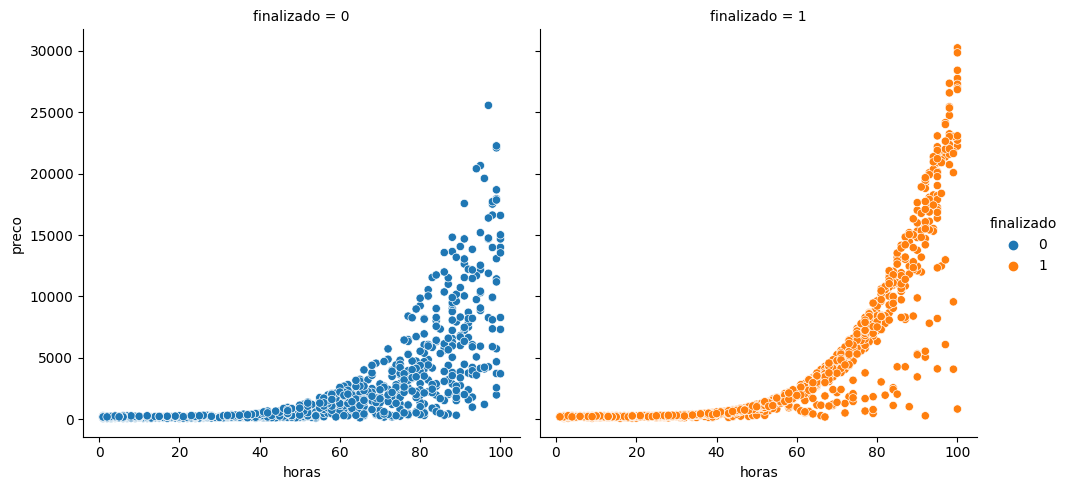

In [5]:
sns.relplot(x='horas', y='preco', data=dados, col='finalizado', hue='finalizado')

In [8]:
x = dados[['horas', 'preco']]
y = dados['finalizado']

In [76]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25,
                                                        stratify=y, random_state=SEED)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)

print(f'A acuracia foi de {(acuracia * 100):.2f}%')

A acuracia foi de 55.56%


/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [75]:
previsoes_de_base = np.ones(540)

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
acuracia = accuracy_score(teste_y, previsoes_de_base)

print(f'A acuracia de base foi de {(acuracia * 100):.2f}%')

A acuracia de base foi de 52.59%


/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
